<a href="https://colab.research.google.com/github/ibrahimmhammed/projects/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score , recall_score , f1_score
from sklearn.metrics import classification_report
plt.style.use("fivethirtyeight")
import warnings
warnings.filterwarnings("ignore")



**Reading Files**

In [ ]:
data = pd.read_csv("//content//diabetes.csv")

**Data Exploration**

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.duplicated().sum()

0

**Data Analysis**

In [ ]:
cor = data.corr() #measuring correlation
cor

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

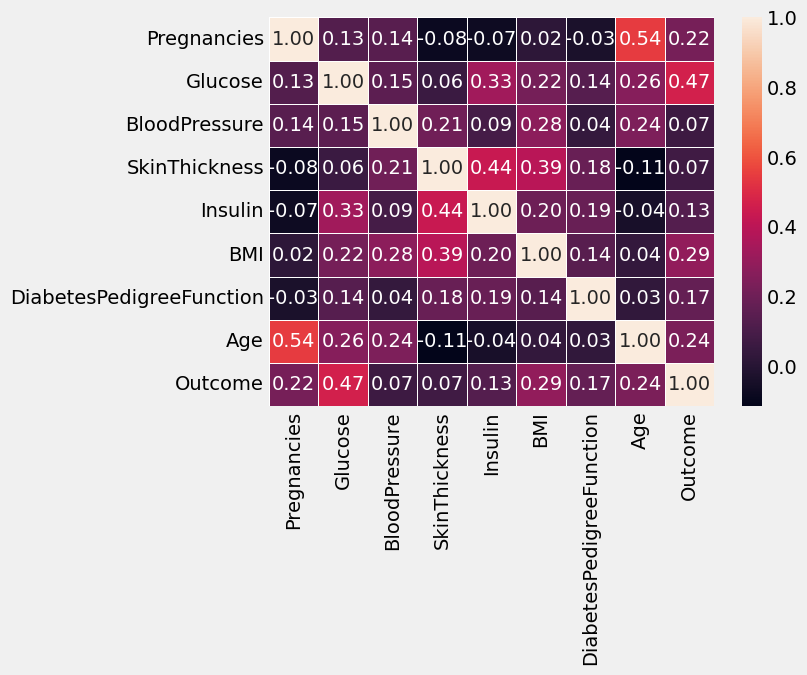

In [ ]:
sns.heatmap(cor,annot=True,fmt="0.2f",linewidths=0.5)    #visualizing correlation

<Axes: xlabel='Outcome', ylabel='count'>

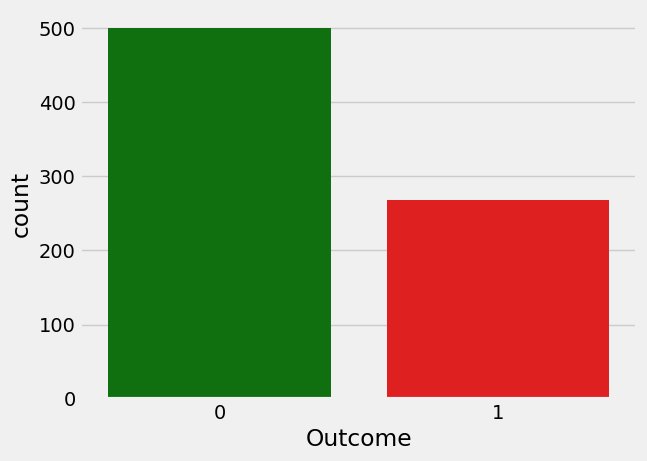

In [ ]:
sns.countplot(x="Outcome",data=data,palette=["g","r"]) #how many people have diabetes and dont have


<Axes: title={'center': 'box plot'}, ylabel='Pregnancies'>

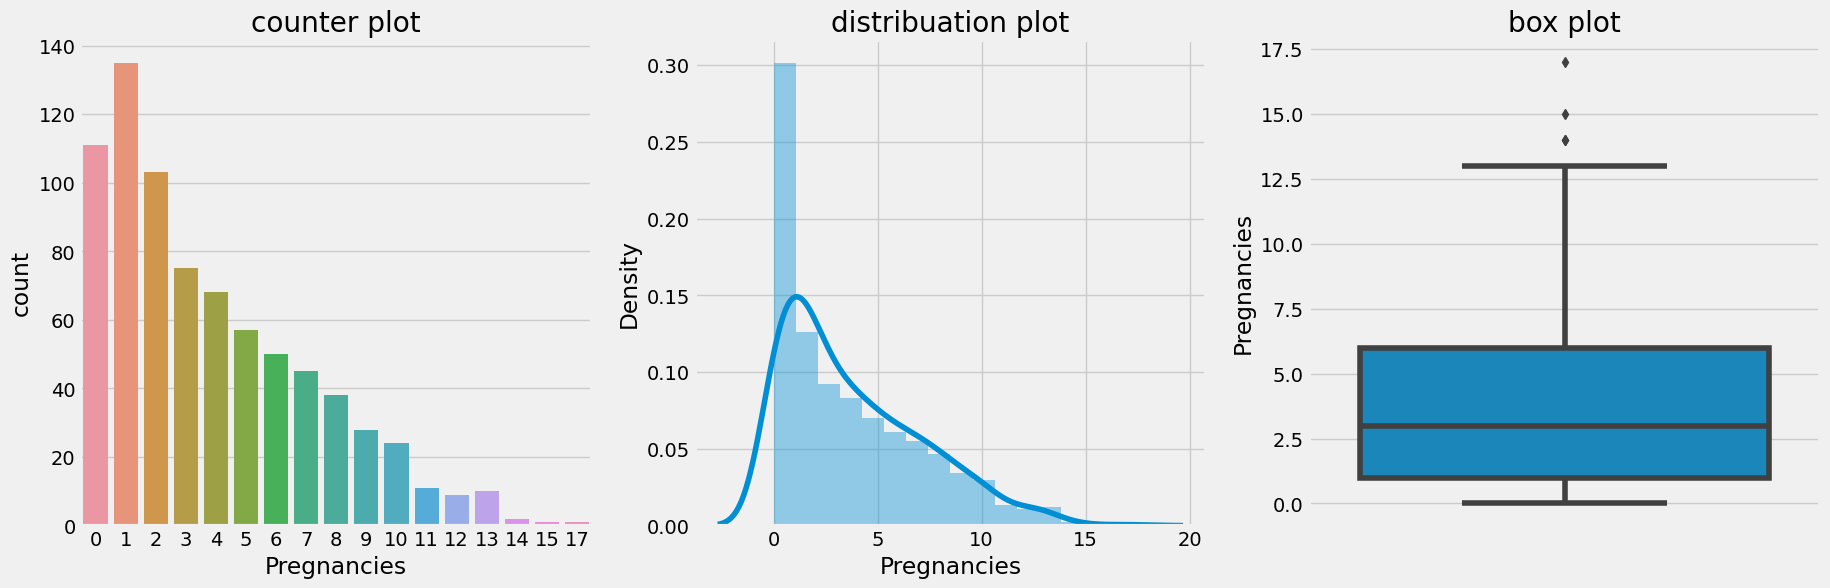

In [ ]:
plt.figure(figsize=(20,6)) #Pregnancies visualizations
plt.subplot(1,3,1)
plt.title("counter plot")
sns.countplot(x= "Pregnancies", data=data)

plt.subplot(1,3,2)
plt.title("distribuation plot")
sns.distplot(data ["Pregnancies"])

plt.subplot(1,3,3)
plt.title("box plot")
sns.boxplot(y=data["Pregnancies"])




**Create Model**

In [ ]:
x= data.drop(["Outcome","BloodPressure","SkinThickness","Insulin"],axis=1) #difining x
y= data["Outcome"] #difining x

In [ ]:
#to deal with unbalanced data
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter


In [ ]:
randomoversample= RandomOverSampler(random_state=44)
new_x,new_y= randomoversample.fit_resample(x,y)
print("old dataset shape{}".format(Counter(y)))
print("old dataset shape{}".format(Counter(new_y)))

old dataset shapeCounter({0: 500, 1: 268})
old dataset shapeCounter({1: 500, 0: 500})


In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=44,shuffle=True) #spliting x,y

In [ ]:
model1 = LogisticRegression(C=1.25) #difining my algorithms
model2 = SVC()
model3= RandomForestClassifier(criterion="entropy",n_estimators=100)
model4= GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,loss="exponential")


In [ ]:
#to gather all results together
columns = ["LogisticRegression","SVC","RandomForestClassifier","GradientBoostingClassifier"]
result1=[]
result2=[]
result3=[]
result4=[]


In [ ]:
def testing (model): #making a function to test algorithms
  model.fit(x_train,y_train)
  pred= model.predict(x_test)
  accuracy= accuracy_score(pred,y_test)
  recall = recall_score(pred,y_test)
  f1 = f1_score(pred,y_test)
  confusionmatrix= confusion_matrix(pred,y_test)

  result1.append(accuracy)
  result2.append(recall)
  result3.append(f1)
  result4.append(confusionmatrix)



  print(model)
  print("accuracy is :\n ", accuracy )
  print("recall score is :\n ", recall)
  print("f1 score is : \n", f1)
  print("confusion matrix is : \n", confusionmatrix)




In [ ]:
testing(model1)


LogisticRegression(C=1.25)
accuracy is :
  0.8051948051948052
recall score is :
  0.8813559322033898
f1 score is : 
 0.6979865771812079
confusion matrix is : 
 [[134  38]
 [  7  52]]


In [ ]:
testing(model2)

SVC()
accuracy is :
  0.7532467532467533
recall score is :
  0.8666666666666667
f1 score is : 
 0.5777777777777778
confusion matrix is : 
 [[135  51]
 [  6  39]]


In [ ]:
testing(model3)

RandomForestClassifier(criterion='entropy')
accuracy is :
  0.7835497835497836
recall score is :
  0.8225806451612904
f1 score is : 
 0.6710526315789475
confusion matrix is : 
 [[130  39]
 [ 11  51]]


In [ ]:
testing(model4)

GradientBoostingClassifier(loss='exponential', n_estimators=500)
accuracy is :
  0.7402597402597403
recall score is :
  0.6785714285714286
f1 score is : 
 0.6551724137931035
confusion matrix is : 
 [[114  33]
 [ 27  57]]


In [ ]:
result1 #all accuracy scores

[0.8051948051948052,
 0.7532467532467533,
 0.7835497835497836,
 0.7402597402597403]

In [ ]:
result2 #all recall scores

[0.8813559322033898,
 0.8666666666666667,
 0.8225806451612904,
 0.6785714285714286]

In [ ]:
result3 #all f1 scores

[0.6979865771812079,
 0.5777777777777778,
 0.6710526315789475,
 0.6551724137931035]

In [ ]:
result4 #all confusion matrix

[array([[134,  38],
        [  7,  52]]),
 array([[135,  51],
        [  6,  39]]),
 array([[130,  39],
        [ 11,  51]]),
 array([[114,  33],
        [ 27,  57]])]

In [ ]:
final_result=pd.DataFrame({"Algorithms":columns,"Acurracies":result1,"Recall":result2,"f1_score":result3,"confusion_matrix":result4}) #gathering all results in a dataframe
final_result

,Algorithms,Acurracies,Recall,f1_score,confusion_matrix
0,LogisticRegression,0.805195,0.881356,0.697987,"[[134, 38], [7, 52]]"
1,SVC,0.753247,0.866667,0.577778,"[[135, 51], [6, 39]]"
2,RandomForestClassifier,0.783550,0.822581,0.671053,"[[130, 39], [11, 51]]"
3,GradientBoostingClassifier,0.740260,0.678571,0.655172,"[[114, 33], [27, 57]]"


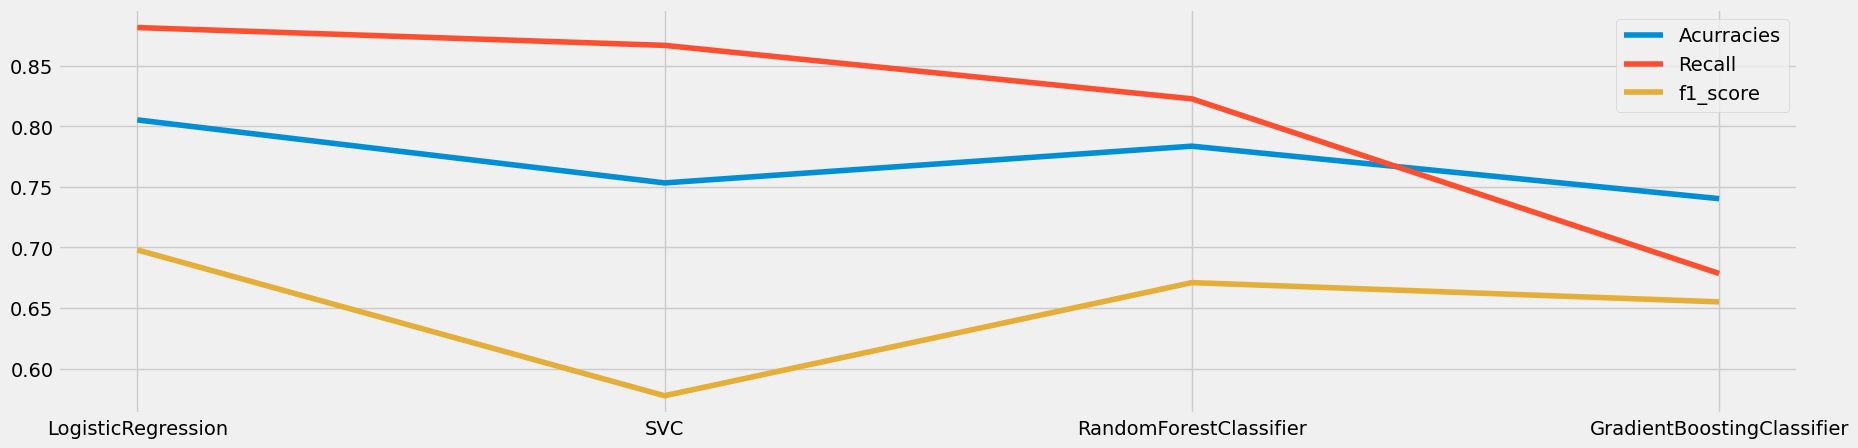

In [ ]:
fig,ax= plt.subplots(figsize=(20,5)) #graphing all results
plt.plot(final_result.Algorithms,result1,label="Acurracies")
plt.plot(final_result.Algorithms,result2,label="Recall")
plt.plot(final_result.Algorithms,result3,label="f1_score")
plt.legend()
plt.show()


